In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import GPy

# Not really needed, but nicer plots
import seaborn as sns
sns.set()
sns.set_context("talk")

In [2]:
d = 1          # input dimension
var = 1.       # variance
theta = 0.2    # lengthscale
k = GPy.kern.RBF(d, variance=var, lengthscale=theta)

In [3]:
print(k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    0.2  |      +ve      |        


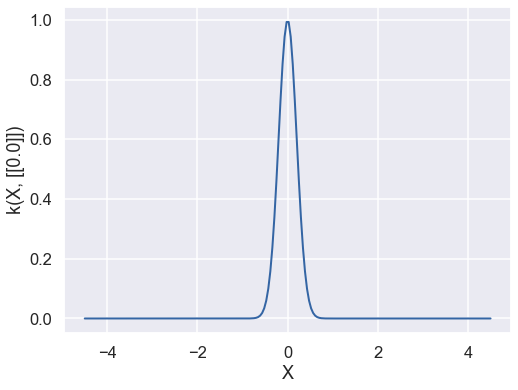

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
k.plot(ax=ax);

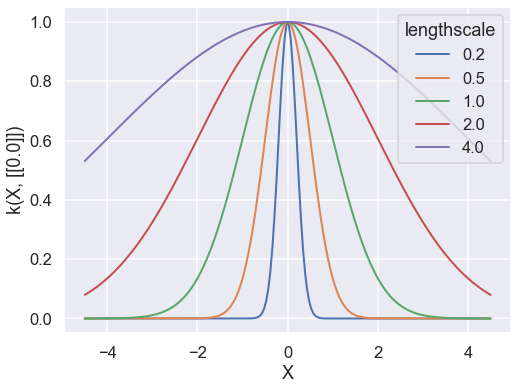

In [5]:
k = GPy.kern.RBF(d)     # By default, the parameters are set to 1.
theta = np.asarray([0.2,0.5,1.,2.,4.])

fig, ax = plt.subplots(figsize=(8,6))
for it, t in enumerate(theta):
    k.lengthscale=t
    k.plot(ax=ax,color=f"C{it}")
    plt.legend(theta,title='lengthscale')

In [6]:
# Exercise 1 b) answer
# insert code here




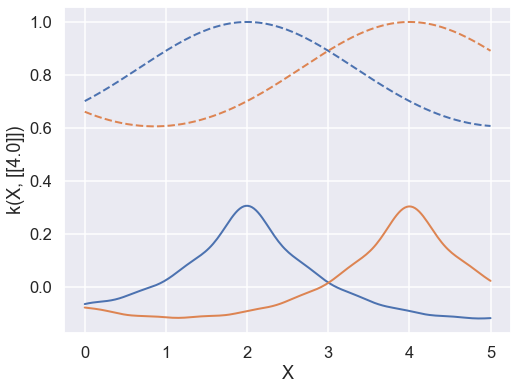

In [7]:
kb1 = GPy.kern.PeriodicExponential(input_dim=1, variance=1.0, lengthscale=1.0, period=6.28)
kb2 = GPy.kern.StdPeriodic(input_dim=1, variance=1.0, lengthscale=1.0, period=6.28)
inputs = np.array([2., 4.])

fig, ax = plt.subplots(figsize=(8,6))
for ix, x in enumerate(inputs):
    kb1.plot(x,plot_limits=[0,5],ax=ax,color=f"C{ix}")
    kb2.plot(x,plot_limits=[0,5],ax=ax,color=f"C{ix}",linestyle='--')

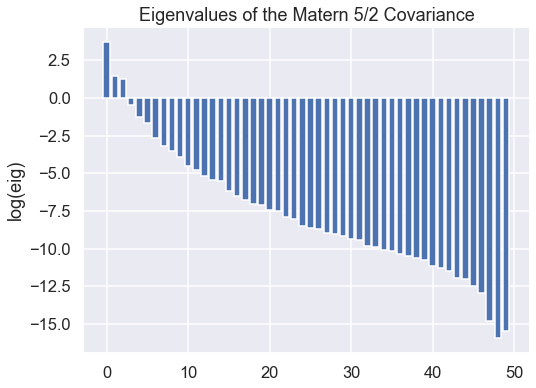

In [8]:
k = GPy.kern.Matern52(input_dim=2)
X = np.random.rand(50,2)       # 50*2 matrix of iid standard Gaussians
C = k.K(X,X)
eigvals = np.linalg.eigvals(C)           # Computes the eigenvalues of a matrix

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(np.arange(len(eigvals)), np.log(eigvals))
ax.set(ylabel='log(eig)',title='Eigenvalues of the Matern 5/2 Covariance');

  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat52.variance     |    2.0  |      +ve      |        
  Mat52.lengthscale  |    4.0  |      +ve      |        


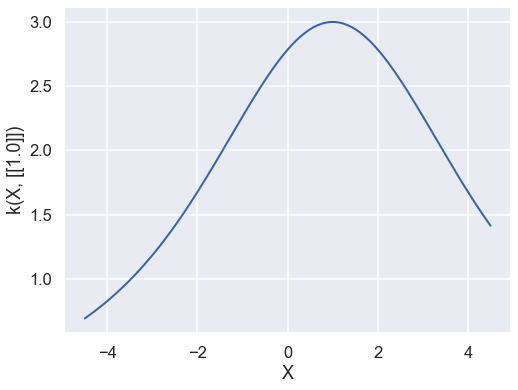

In [9]:
kern1 = GPy.kern.RBF(1, variance=1., lengthscale=2.)
kern2 = GPy.kern.Matern52(1, variance=2., lengthscale=4.)
kern = kern1 + kern2
print(kern)
fig, ax = plt.subplots(figsize=(8,6))
kern.plot(ax=ax);

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat52.variance     |    2.0  |      +ve      |        
  Mat52.lengthscale  |    4.0  |      +ve      |        


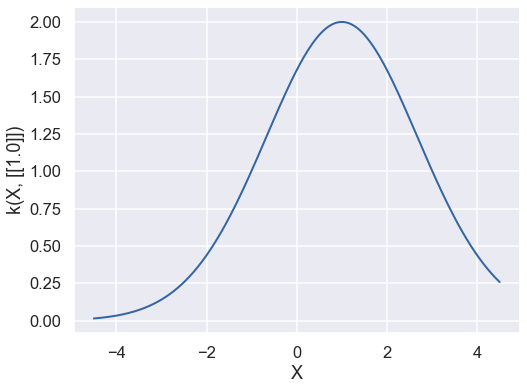

In [10]:
kern = kern1*kern2
print(kern)
fig, ax = plt.subplots(figsize=(8,6))
kern.plot(ax=ax);

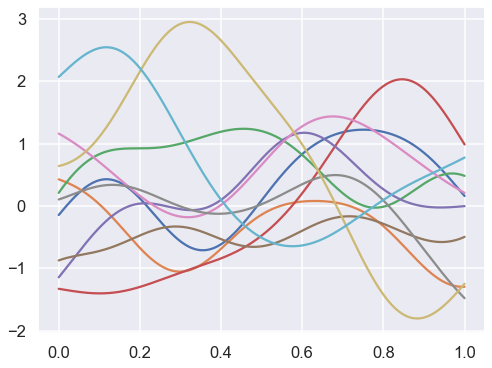

In [11]:
k = GPy.kern.RBF(input_dim=1,lengthscale=0.2)

X = np.linspace(0.,1.,500) # define X to be 500 points evenly spaced over [0,1]
X = X[:,None] # reshape X to make it n*p --- GPy uses 'design matrices'

mu = np.zeros(len(X)) # vector of the means --- we could use a mean function here, but here it is just zero.
C = k.K(X,X) # compute the covariance matrix associated with inputs X

# Generate 'nsamples' separate samples paths from a Gaussian with mean mu and covariance C
nsamples=10
Z = np.random.multivariate_normal(mu,C,nsamples)

fig, ax = plt.subplots(figsize=(8,6))
for i in range(nsamples):
    ax.plot(X[:],Z[i,:]);

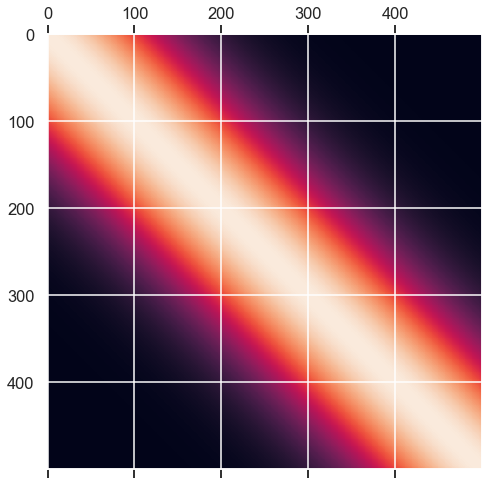

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(C);

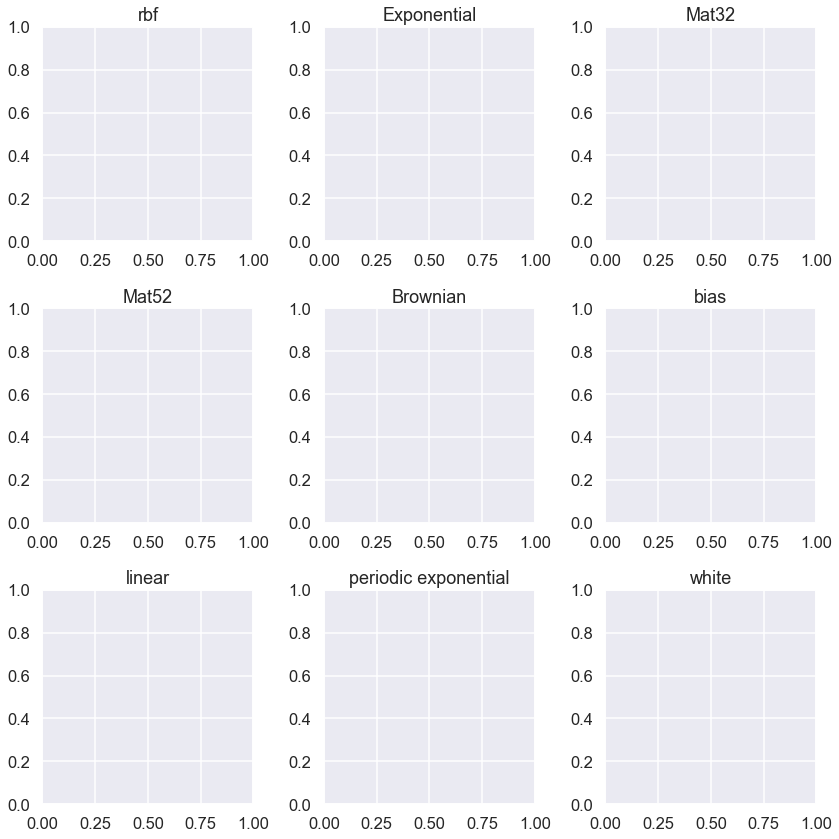

In [13]:
figure, axes = plt.subplots(3,3, figsize=(12,12), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), GPy.kern.Matern52(1), GPy.kern.Brownian(1), GPy.kern.Bias(1), GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1)]


X = np.linspace(0.,1.,500) 
X = X[:,None] 
mu = np.zeros(len(X)) # vector of the means --- we could use a mean function here, but here it is just zero.
nsamples=10    
    
for k,a in zip(kerns, axes.flatten()):
    C = k.K(X,X) # compute the covariance matrix associated with inputs X
    Z = np.random.multivariate_normal(mu,C,nsamples)
    a.set_title(k.name.replace('_', ' '))

In [14]:
# Enter code here
#

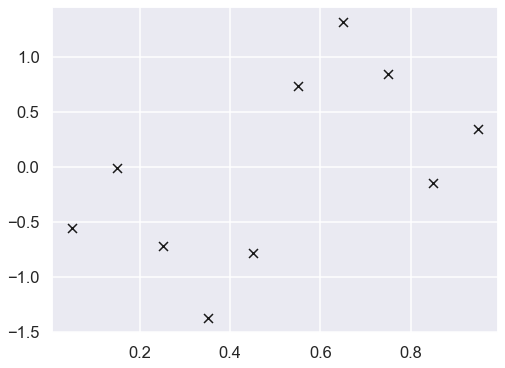

In [15]:
X = np.linspace(0.05,0.95,10)[:,None]
Y = -np.cos(np.pi*X) + np.sin(4*np.pi*X) + np.random.normal(loc=0.0, scale=0.1, size=(10,1)) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X,Y,'kx',mew=1.5);

In [16]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [17]:
m = GPy.models.GPRegression(X,Y,k)

In [18]:
print(m)


Name : GP regression
Objective : 13.472358120897074
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


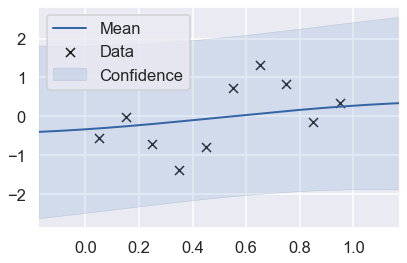

In [19]:
m.plot();

In [20]:
Xnew = np.linspace(0.0,1.5,4)[:,None]
(Ymean,Yvar) = m.predict(Xnew)
# quantiles=(2.5, 97.5) are default
(Ylo95,Yhi95) = m.predict_quantiles(Xnew)

print(r"  X   mean Y   var Y   lo95%   hi95%")
for (Xi,Ymeani,Yvari,Yloi,Yhii) in zip(Xnew,Ymean,Yvar,Ylo95,Yhi95):
    print(f"{Xi[0]:5.2f}  {Ymeani[0]:5.2f}   {Yvari[0]:5.2f}   {Yloi[0]:5.2f}   {Yhii[0]:5.2f}")

  X   mean Y   var Y   lo95%   hi95%
 0.00  -0.34    1.20   -2.49    1.81
 0.50  -0.03    1.10   -2.09    2.02
 1.00   0.27    1.20   -1.88    2.42
 1.50   0.39    1.48   -1.99    2.77


In [21]:
# Exercise 4 b) 
# make a plot for a better fit here




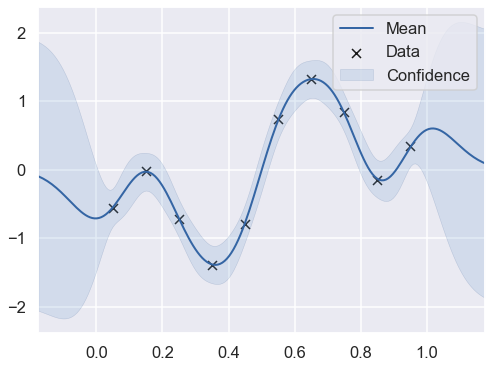

In [22]:
# KEY
m['Gaussian_noise.variance'] = 0.01
m['rbf.lengthscale'] = 0.1
fig, ax = plt.subplots(figsize=(8,6))
m.plot(ax=ax);

In [23]:
# Exercise 4 c) answer




In [24]:
m.constrain_positive()

reconstraining parameters GP_regression



Name : GP regression
Objective : 8.778117733552062
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.8265210496983392  |      +ve      |        
  rbf.lengthscale          |  0.12636577414897168  |      +ve      |        
  Gaussian_noise.variance  |  0.01847185990417295  |      +ve      |        


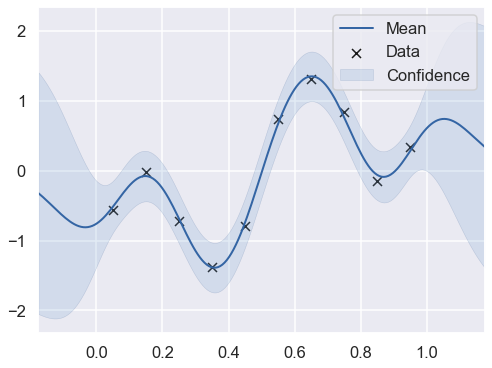

In [25]:
m.optimize()
fig, ax = plt.subplots(figsize=(8,6))
m.plot(ax=ax)
print(m)